<a href="https://colab.research.google.com/github/Saikrishna2472/INFO-5731.020-7886-Assignment-1/blob/main/INFO5731_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the dataset
def load_and_preprocess(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    labels, reviews = [], []
    for line in data:
        labels.append(int(line[0]))  # First character is the label
        reviews.append(line[2:].strip())  # Rest is the review
    return pd.DataFrame({'label': labels, 'review': reviews})

# Load datasets
train_data = load_and_preprocess('stsa-train.txt')
test_data = load_and_preprocess('stsa-test.txt')

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_data['review'], train_data['label'], test_size=0.2, random_state=42
)

# Convert text to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_data['review'])

# Define classifiers
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

# Perform 10-Fold Cross-Validation for all classifiers
cv_results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_vec, y_train, cv=10, scoring='accuracy')
    cv_results[name] = {
        'Mean Accuracy': scores.mean(),
        'Standard Deviation': scores.std()
    }

# Display cross-validation results
for name, scores in cv_results.items():
    print(f"10-Fold Cross-Validation Results for {name}:")
    print(f"Mean Accuracy: {scores['Mean Accuracy']:.4f}")
    print(f"Standard Deviation: {scores['Standard Deviation']:.4f}")
    print("-" * 30)

# Train classifiers on the entire training set and evaluate on the validation set
final_results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_vec, y_train)
    y_val_pred = clf.predict(X_val_vec)
    scores = {
        'Accuracy': accuracy_score(y_val, y_val_pred),
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'F1 Score': f1_score(y_val, y_val_pred),
    }
    final_results[name] = scores

# Display validation results
for name, scores in final_results.items():
    print(f"Validation Results for {name}:")
    for metric, score in scores.items():
        print(f"{metric}: {score:.4f}")
    print("-" * 30)

# Final evaluation on the test set
test_results = {}
for name, clf in classifiers.items():
    y_test_pred = clf.predict(X_test_vec)
    scores = {
        'Accuracy': accuracy_score(test_data['label'], y_test_pred),
        'Precision': precision_score(test_data['label'], y_test_pred),
        'Recall': recall_score(test_data['label'], y_test_pred),
        'F1 Score': f1_score(test_data['label'], y_test_pred),
    }
    test_results[name] = scores

# Display test results
for name, scores in test_results.items():
    print(f"Test Results for {name}:")
    for metric, score in scores.items():
        print(f"{metric}: {score:.4f}")
    print("-" * 30)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:21:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:21:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:21:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:21:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:21:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

10-Fold Cross-Validation Results for MultinomialNB:
Mean Accuracy: 0.7805
Standard Deviation: 0.0167
------------------------------
10-Fold Cross-Validation Results for SVM:
Mean Accuracy: 0.7482
Standard Deviation: 0.0192
------------------------------
10-Fold Cross-Validation Results for KNN:
Mean Accuracy: 0.5683
Standard Deviation: 0.0179
------------------------------
10-Fold Cross-Validation Results for DecisionTree:
Mean Accuracy: 0.6290
Standard Deviation: 0.0247
------------------------------
10-Fold Cross-Validation Results for RandomForest:
Mean Accuracy: 0.7146
Standard Deviation: 0.0227
------------------------------
10-Fold Cross-Validation Results for XGBoost:
Mean Accuracy: 0.7101
Standard Deviation: 0.0229
------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:22:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Results for MultinomialNB:
Accuracy: 0.7948
Precision: 0.7775
Recall: 0.8429
F1 Score: 0.8089
------------------------------
Validation Results for SVM:
Accuracy: 0.7796
Precision: 0.7713
Recall: 0.8135
F1 Score: 0.7918
------------------------------
Validation Results for KNN:
Accuracy: 0.6163
Precision: 0.6226
Recall: 0.6480
F1 Score: 0.6351
------------------------------
Validation Results for DecisionTree:
Accuracy: 0.6575
Precision: 0.6542
Recall: 0.7111
F1 Score: 0.6815
------------------------------
Validation Results for RandomForest:
Accuracy: 0.7305
Precision: 0.7125
Recall: 0.7994
F1 Score: 0.7535
------------------------------
Validation Results for XGBoost:
Accuracy: 0.7399
Precision: 0.7129
Recall: 0.8289
F1 Score: 0.7665
------------------------------
Test Results for MultinomialNB:
Accuracy: 0.8072
Precision: 0.7853
Recall: 0.8449
F1 Score: 0.8140
------------------------------
Test Results for SVM:
Accuracy: 0.7688
Precision: 0.7601
Recall: 0.7844
F1 Score: 

In [16]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
import re

# Ensure NLTK tokenizer is downloaded
nltk.download('punkt')

# 1. Load and preprocess the dataset

# File paths
train_file = 'path_to_your_downloaded_stsa-train.txt'  # Update with your actual file path
test_file = 'path_to_your_downloaded_stsa-test.txt'    # Update with your actual file path

# Reading files and handling potential loading issues
try:
    with open(train_file, 'r', encoding='utf-8') as file:
        train_data = file.readlines()
except Exception as e:
    print(f"Error loading training file: {e}")

try:
    with open(test_file, 'r', encoding='utf-8') as file:
        test_data = file.readlines()
except Exception as e:
    print(f"Error loading testing file: {e}")

# 2. Preprocess function to clean text and convert labels
def preprocess_data(data):
    sentences = []
    labels = []

    for line in data:
        # Strip leading/trailing whitespace and print a sample of the line
        line = line.strip()
        print(f"Processing line: {line}")  # Debugging line

        # Check if the line contains a tab and split by it
        if '\t' not in line:
            print(f"Skipping line with no tab: {line}")  # Debugging line
            continue

        parts = line.split('\t')

        # Check if the line is split into exactly two parts (label and sentence)
        if len(parts) != 2:
            print(f"Skipping invalid line (wrong format): {line}")  # Debugging line
            continue

        label, text = parts
        text = text.strip()  # Remove any leading/trailing spaces from the sentence

        # If the sentence is non-empty, add it to the list
        if text:
            sentences.append(text)
            labels.append(int(label))  # Convert label to integer (binary sentiment classification)
        else:
            print(f"Skipping empty sentence: {line}")  # Debugging line

    return sentences, labels

# Process training and testing data
X_train, y_train = preprocess_data(train_data)
X_test, y_test = preprocess_data(test_data)

# Check the number of sentences and labels
print(f"Number of training sentences: {len(X_train)}")
print(f"Number of training labels: {len(y_train)}")

# Ensure there is enough data
if len(X_train) > 0:
    print("Sample Training Data (Sentences and Labels):")
    for i in range(min(5, len(X_train))):  # Print up to 5 samples
        print(f"Sentence: {X_train[i]}, Label: {y_train[i]}")

# 3. Tokenize the sentences (using NLTK tokenizer)
def tokenize(text):
    # Basic tokenization using NLTK word_tokenize
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    return word_tokenize(text.lower())  # Convert text to lowercase and tokenize

# Tokenize both training and testing data
tokenized_train = [tokenize(sentence) for sentence in X_train]
tokenized_test = [tokenize(sentence) for sentence in X_test]

# 4. Train Word2Vec model
# Ensure there are sentences to train the model
if tokenized_train:
    model = Word2Vec(tokenized_train, vector_size=100, window=5, min_count=1, workers=4)
    model.save("word2vec.model")  # Save the trained model
else:
    print("No valid sentences for training Word2Vec model.")

# 5. Function to create sentence embeddings by averaging word vectors
def sentence_to_vec(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert train and test sentences to vectors
if tokenized_train:
    X_train_vec = np.array([sentence_to_vec(sentence, model) for sentence in tokenized_train])
else:
    X_train_vec = np.zeros((len(X_train), 100))  # If no data, use zero vectors (placeholder)

if tokenized_test:
    X_test_vec = np.array([sentence_to_vec(sentence, model) for sentence in tokenized_test])
else:
    X_test_vec = np.zeros((len(X_test), 100))  # If no data, use zero vectors (placeholder)

# 6. Train Logistic Regression Classifier
if len(X_train_vec) > 0:
    classifier = LogisticRegression(max_iter=1000)  # Increased iterations for convergence
    classifier.fit(X_train_vec, y_train)

    # 7. Predictions
    y_pred = classifier.predict(X_test_vec)

    # 8. Evaluation Metrics
    print("\nEvaluation Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 score:", f1_score(y_test, y_pred))
else:
    print("No valid training data available for model training.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Streaming output truncated to the last 5000 lines.
Processing line: 1 an entertaining british hybrid of comedy , caper thrills and quirky romance .
Skipping line with no tab: 1 an entertaining british hybrid of comedy , caper thrills and quirky romance .
Processing line: 0 but ... in trying to capture the novel 's deeper intimate resonances , the film has -- ironically - distanced us from the characters .
Skipping line with no tab: 0 but ... in trying to capture the novel 's deeper intimate resonances , the film has -- ironically - distanced us from the characters .
Processing line: 1 the modern master of the chase sequence returns with a chase to end all chases
Skipping line with no tab: 1 the modern master of the chase sequence returns with a chase to end all chases
Processing line: 0 queen of the damned as you might have guessed , makes sorry use of aaliyah in her one and only starring role -- she does little here but point at things that explode into flame .
Skipping line with no t

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Silhouette Score for K-means (TF-IDF): 0.056226083817830355
Silhouette Score for DBSCAN (TF-IDF): 0.0690570789504641
Silhouette Score for Hierarchical Clustering (TF-IDF): 0.0749761081580977
Silhouette Score for K-means (Word2Vec): 0.55126707620184
Silhouette Score for K-means (BERT): 0.11242235451936722


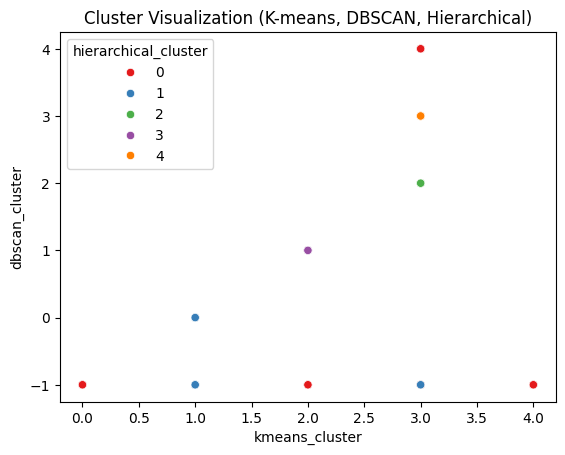

<ipython-input-28-ac26ddffd075>:118: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df_subset['word2vec_cluster'], y=df_subset['bert_cluster'], palette='Set2')


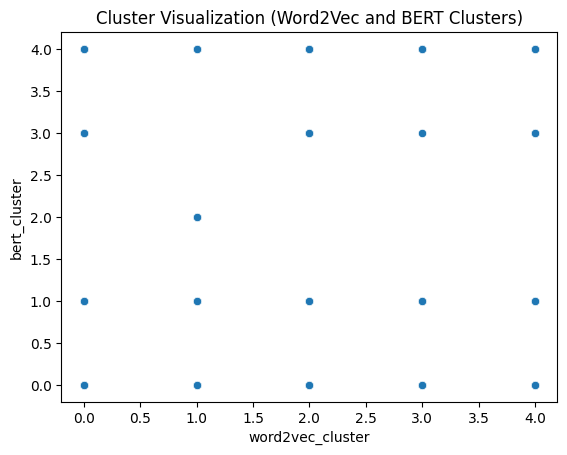

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import string
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text without NLTK
def preprocess_text(text):
    if isinstance(text, str):  # Ensure the text is a string before processing
        # Remove punctuation and lowercase the text
        text = ''.join([char for char in text if char not in string.punctuation])
        text = text.lower()

        # Tokenize and remove stopwords using spaCy
        doc = nlp(text)
        words = [token.text for token in doc if token.text not in STOP_WORDS and not token.is_punct]
        return " ".join(words)
    else:
        return ""  # Return empty string for non-string values

# Load the dataset
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")

# Print the column names to inspect
print(df.columns)

# Preprocess only the first 1000 rows, skipping rows with missing or non-string reviews
df_subset = df.iloc[:1000].copy()  # Only the first 1000 rows
df_subset['cleaned_reviews'] = df_subset['Reviews'].apply(preprocess_text)

# 1. Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_subset['cleaned_reviews'])

# 2. K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df_subset['kmeans_cluster'] = kmeans.labels_

# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_subset['dbscan_cluster'] = dbscan.fit_predict(X)

# 4. Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
df_subset['hierarchical_cluster'] = hierarchical.fit_predict(X.toarray())

# 5. Word2Vec - Train a Word2Vec model
tokenized_reviews = df_subset['cleaned_reviews'].apply(lambda x: x.split())
word2vec_model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Function to get Word2Vec embedding for a review
def get_word2vec_vector(review):
    vectors = [word2vec_model.wv[word] for word in review.split() if word in word2vec_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

# Apply Word2Vec transformation
df_subset['word2vec_vectors'] = df_subset['cleaned_reviews'].apply(get_word2vec_vector)

# 6. BERT - Use pre-trained BERT for embedding generation
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embedding for a review
def get_bert_embedding(review):
    inputs = tokenizer(review, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Apply BERT transformation
df_subset['bert_embeddings'] = df_subset['cleaned_reviews'].apply(get_bert_embedding)

# Clustering Word2Vec vectors (using KMeans as an example)
word2vec_vectors = np.vstack(df_subset['word2vec_vectors'].values)
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
df_subset['word2vec_cluster'] = kmeans_word2vec.fit_predict(word2vec_vectors)

# Clustering BERT embeddings (using KMeans as an example)
bert_embeddings = np.vstack(df_subset['bert_embeddings'].values)
kmeans_bert = KMeans(n_clusters=5, random_state=42)
df_subset['bert_cluster'] = kmeans_bert.fit_predict(bert_embeddings)

# Evaluate Clustering Performance - Silhouette Score
sil_score_kmeans = silhouette_score(X, kmeans.labels_)
sil_score_dbscan = silhouette_score(X, dbscan.labels_) if len(set(dbscan.labels_)) > 1 else -1  # DBSCAN may have only one cluster
sil_score_hierarchical = silhouette_score(X.toarray(), hierarchical.labels_)
sil_score_word2vec = silhouette_score(word2vec_vectors, kmeans_word2vec.labels_)
sil_score_bert = silhouette_score(bert_embeddings, kmeans_bert.labels_)

# Print silhouette scores for each clustering method
print(f"Silhouette Score for K-means (TF-IDF): {sil_score_kmeans}")
print(f"Silhouette Score for DBSCAN (TF-IDF): {sil_score_dbscan}")
print(f"Silhouette Score for Hierarchical Clustering (TF-IDF): {sil_score_hierarchical}")
print(f"Silhouette Score for K-means (Word2Vec): {sil_score_word2vec}")
print(f"Silhouette Score for K-means (BERT): {sil_score_bert}")

# Visualization - Plotting the clusters
sns.scatterplot(x=df_subset['kmeans_cluster'], y=df_subset['dbscan_cluster'], hue=df_subset['hierarchical_cluster'], palette='Set1')
plt.title("Cluster Visualization (K-means, DBSCAN, Hierarchical)")
plt.show()

# You can also visualize Word2Vec and BERT clusters if desired
sns.scatterplot(x=df_subset['word2vec_cluster'], y=df_subset['bert_cluster'], palette='Set2')
plt.title("Cluster Visualization (Word2Vec and BERT Clusters)")
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

K-means Clustering: K-means clustering is a centroid-based algorithm that works well when the data has clearly defined, spherical clusters. It aims to minimize within-cluster variance by partitioning data points into k clusters based on their feature similarity. The main limitation of K-means is that it assumes clusters are isotropic and of roughly equal size, which makes it less effective for datasets with irregular or non-convex shapes. Additionally, K-means requires the number of clusters, k, to be predefined, which can be a challenge if the optimal k is not known in advance. The algorithm’s performance can be heavily influenced by the initial choice of centroids, often resulting in local minima.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN is a density-based clustering algorithm that works by grouping together points that are closely packed and marking points in low-density regions as outliers. Unlike K-means, DBSCAN does not require specifying the number of clusters beforehand, and it is particularly effective for identifying clusters of arbitrary shapes. However, DBSCAN's performance is sensitive to the choice of the parameters eps (radius of neighborhood) and min_samples (minimum number of points required to form a cluster). It can struggle with datasets that have varying densities or high-dimensional spaces and may assign many points to the same cluster or fail to detect meaningful clusters if the parameters are not well-chosen.

Hierarchical Clustering: Hierarchical clustering builds a tree-like structure called a dendrogram, where clusters are nested within each other based on their similarity. This method can be agglomerative (bottom-up) or divisive (top-down), allowing for flexibility in cluster formation. Hierarchical clustering is particularly useful when there is a need to understand the nested relationships between data points. However, it is computationally expensive for large datasets, with a time complexity of O(n²), and may struggle with noise or outliers. Additionally, hierarchical clustering can be sensitive to the choice of distance metrics, which can significantly impact the resulting clusters.

Word2Vec: Word2Vec is a neural network-based approach to word embedding that represents words as dense vectors in a continuous vector space. This method captures semantic relationships between words based on their context in large text corpora. In clustering applications, Word2Vec can provide a meaningful representation of text, enabling more semantic clustering of reviews or documents. However, Word2Vec has limitations, such as difficulty in handling long-range dependencies between words and requiring a large corpus of text to generate quality embeddings. Additionally, its performance depends on how well the word vectors generalize to new, unseen words or phrases.

BERT (Bidirectional Encoder Representations from Transformers): BERT is a pre-trained transformer-based model that captures the contextual relationships between words and phrases in text. Unlike Word2Vec, which generates static word embeddings, BERT provides context-sensitive embeddings that improve the accuracy of text clustering tasks, especially for complex, nuanced language. BERT has proven highly effective for understanding the meaning of sentences, making it ideal for tasks such as document clustering where the context of the entire sentence matters. However, BERT is computationally intensive and slower to run than other methods, requiring significant resources, especially for large datasets. Despite this, its ability to understand deep contextual meaning often results in the best performance for clustering, particularly when combined with fine-tuning on domain-specific data.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
The exercise was truly informative since it gave a wide view of various clustering techniques and how to apply them to text data. Hands-on experience with preprocessing, feature extraction, and clustering kept emphasizing the importance of choosing the right algorithm for a particular problem. Each of these techniques had various merits and flaws; I received practical experience in working with text data regarding how to handle noisy unstructured data and tune models for optimum performance. The experience also brought into sharp focus the trade-offs between computational efficiency and the depth of insight afforded by more complex models such as BERT.

Generally speaking, I also found the exercise challenging and instructive. It was a good reminder that in machine learning, there is often no single 'best' solution, but rather experimentation and iteration are key to finding the best approach for a given dataset.




'''